In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Create the dataset

In [4]:
X,y = make_blobs(
    n_samples=100,
    n_features=2, 
    centers=3
)

### plot the data

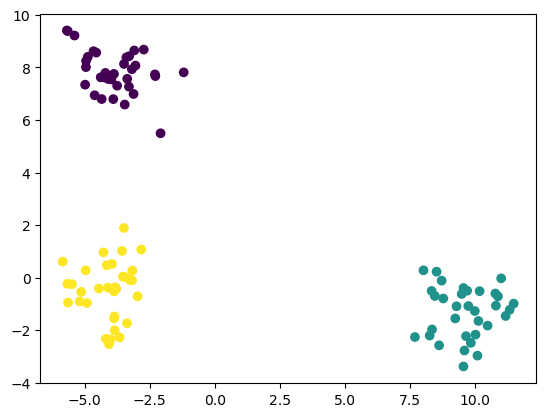

In [5]:
plt.scatter( X[:,0] , X[:,1] , c=y )
plt.show()

### scale the data

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
scaler = StandardScaler()

In [9]:
X_train , X_test , y_train , y_test = train_test_split( X,y , test_size=0.25,random_state=43 )

In [10]:
X_train_scale = scaler.fit_transform( X_train )
X_test_scale = scaler.transform( X_test )

### Model importing

In [11]:
from sklearn.cluster import KMeans

In [12]:
# Elbow method to select K value
wcss = []

In [13]:
for k in range( 1,11 ):
    model = KMeans( n_clusters=k , init='k-means++' )
    model.fit( X_train_scale )
    wcss.append(model.inertia_)

In [14]:
wcss

[149.99999999999997,
 54.51819982154848,
 5.688717301732299,
 4.885535832034129,
 3.5792530072056157,
 3.1298979087851855,
 2.3267164390870154,
 1.9885743766286395,
 1.8014500865983818,
 1.4858376093126555]

### plot the ELBOW Method

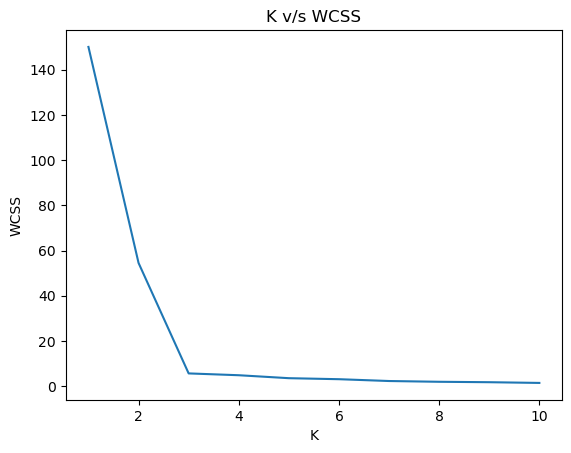

In [15]:
plt.plot( range(1,11) , wcss  )
plt.xlabel("K")
plt.ylabel("WCSS")
plt.title('K v/s WCSS')
plt.show()

### From the plot we can conclude that k value

In [16]:
kmeans = KMeans( n_clusters=3 , init='k-means++' )

In [17]:
kmeans.fit(X_train_scale)

KMeans(n_clusters=3)

In [18]:
y_pred = kmeans.predict( X_test_scale )

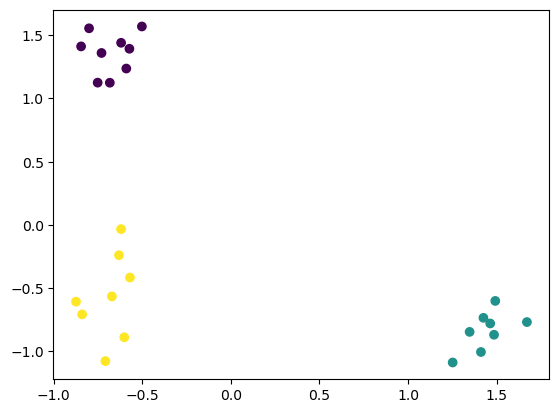

In [19]:
plt.scatter( X_test_scale[:,0] , X_test_scale[:,1] , c=y_pred )
plt.show()

# validating the K- value
### kneelocator
### silhoutte scoring

### kneelocator

In [20]:
# !pip install kneed

In [21]:
from kneed import KneeLocator

In [22]:
kl = KneeLocator( range(1,11) , wcss ,curve = 'convex',  direction='decreasing')

In [23]:
kl.elbow

3

### silhoutte scoring

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
coeff = []

In [26]:
for k in range( 2,11 ):
    model = KMeans( n_clusters=k , init='k-means++' )
    model.fit( X_train_scale )
    score = silhouette_score( X_train_scale , model.labels_ )
    coeff.append(score)

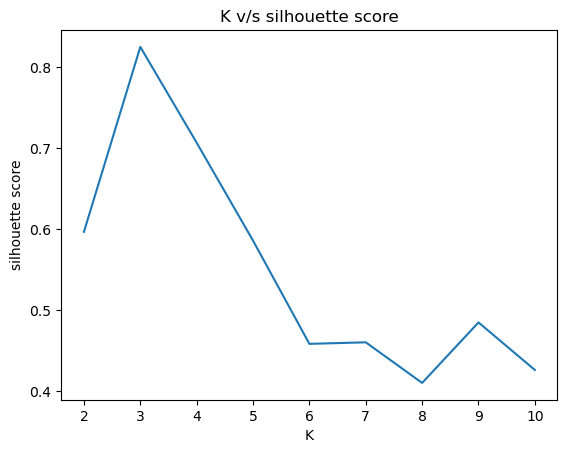

In [27]:
plt.plot( range(2,11) , coeff  )
plt.xlabel("K")
plt.ylabel("silhouette score")
plt.title('K v/s silhouette score')
plt.show()